# 1: Gradient Descent 

Recall that when performing regression and classification analysis our goal is to find a parameter vector $\textbf{$\omega$}$ that represents our predictive model and minimizes a loss function $L[\textbf{$\omega$}]$ associated with it. Gradient Descent is an optimization technique that gradually updates these parameters $\textbf{$\omega$}$ using the gradient of the loss function with respect to said parameters $\nabla_{\textbf{$\omega$}}L[\textbf{$\omega$}]$. The Gradient Descent update equation looks as follows:  

\begin{align*}
\textbf{$\omega$} &= \textbf{$\omega$} - \eta\nabla_{\textbf{$\omega$}}L[\textbf{$\omega$}]
\end{align*}  

where $\eta$ is the learning rate, or step size of the update.  

The gradient is simply the slope of the loss function at a given point $\textbf{$\omega$}$. The goal of Gradient Descent is to update our parameter vector $\textbf{$\omega$}$ in the opposite direction of the gradient until we reach a point where the gradient is zero (or below a pre-set threashold). Such point represents a local minimum of the loss function.

Lets look at a simple example, a quadratic loss function $L[\omega] = 3\omega^2 + 4$. By inspection we know that the minimum loss $L[\textbf{$\omega$}] = 4$ is obtained at $\textbf{$\omega$} = 0$. We make our initial guess for $\textbf{$\omega$}$ by choosing a random number between $-5$ and $5$.

In [2]:
import numpy as np
from scipy import io
from scipy.special import expit
import matplotlib.pyplot as plt
%matplotlib inline

# Loss function
def quad_loss(omg): 
    return 3 * omg**2 + 4

# Gradient of the Loss function
def quad_grad_loss(omg):
    return 6 * omg

# Tangent line
def tan_line(loss, grad_loss, omg, omg_0):
    return grad_loss(omg_0) * (omg - omg_0) + loss(omg_0) 

def plot_loss_omega(loss, grad_loss, omega, ax=(0,80)):
    w = np.linspace(-5,5,200)
    plt.figure()
    plt.plot(w,loss(w))
    plt.plot(omega, loss(omega), '.r')
    plt.plot(w, tan_line(loss, grad_loss, w, omega), '--g')
    plt.axis((-5, 5, ax[0], ax[1]))
    plt.xlabel("omega (w)")
    plt.ylabel("Loss")
    plt.show()

1.3698287719


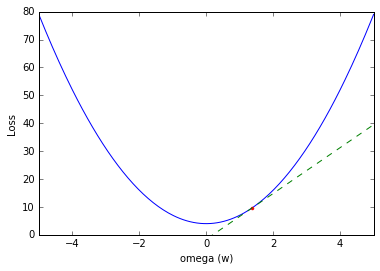

In [2]:
init_omega = np.random.uniform(-5.0,5.0)
print init_omega
plot_loss_omega(quad_loss, quad_grad_loss, init_omega)

* Perform the first update to omega using Gradient Descent. Did our estimate for omega got closer to its optimal value? 

1.28763904559


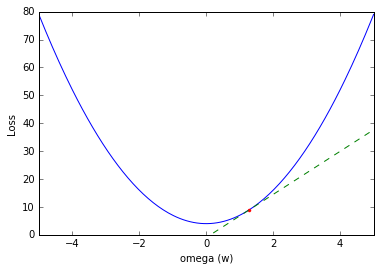

In [3]:
# Learning rate
eta = 0.01

### to do ###
omega = init_omega - eta * quad_grad_loss(init_omega)
print omega
### ### ###

plot_loss_omega(quad_loss, quad_grad_loss, omega)

* Using a while-loop, update omega using Gradient Descent until the absolute difference between the old and new omega is below  0.00001.  
* Save the loss of each iteration to a list loss_lst and plot it after the algorithm converges. Is the loss monotonically decreassing? 

Optimal omega value =  0.000153624599275


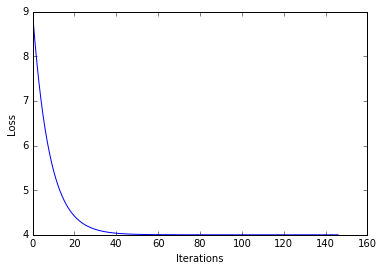

In [4]:
thrshld = 0.00001
loss_lst = []
new_omega = init_omega

### to do ###
while True:
    # update new_omega
    old_omega = new_omega
    new_omega = old_omega - eta * quad_grad_loss(old_omega)
    # register loss corresponding to new_omega
    loss_lst.append(quad_loss(new_omega))
    if abs(new_omega - old_omega) < thrshld:
        break
        
print "Optimal omega value = ", new_omega

# plot loss over iterations
plt.figure()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(loss_lst)
### ### ###

### 1:1 Non-Convex Loss Functions

This is a special case where the loss function is convex. For such functions, Gradient Descent is guaranteed to converge to the global optimum, given that the learning rate is adequately chosen (A value too large for the learning rate could cause the algorithm to not converge).  

If the loss function is not convex, the algorithm would find a local minimum, not necessarily the global minimum, depending on where the initial value of $\textbf{$\omega$}$ lies. Take for example the following loss function, and the initial value of $\textbf{$\omega$} = 0$. 

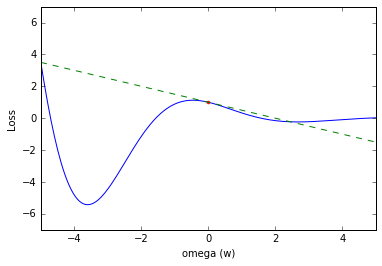

In [5]:
def damping_loss(w):
    return np.exp(-0.5 * w) * np.cos(w)

def damping_grad_loss(w):
    return -0.5 * np.exp(-0.5 * w) * (2 * np.sin(w) + np.cos(w))

plot_loss_omega(damping_loss, damping_grad_loss, 0, (-7,7))

Clearly the global minimum lies at $\textbf{$\omega$} \approx -4$, but since $\textbf{$\omega$}$ was initialized to 0 and the slope at this point is negative, the next update will increase $\textbf{$\omega$}$ and it will eventually reach the local minimum at $\textbf{$\omega$} \approx 2$.

#### Extra:

* Repeat the Gradient Descent algorithm with different values of $\eta$ and compare the numbe of iterations required to converge. Is it better to have a small learning rate? Why?  

# 2: Batch vs Stochastic Gradient Descent

It is easy to compute and/or visualize the gradient (slope) for 2D or even 3D loss functions, but in real world scenarios our parameter vector $\textbf{$\omega$}$ is larger*.  

In order to get a deeper understanding of Gradient Descent at a larger scale we will use the gradient for the Cross-Entropy loss function (corresponding to Logistic Regression) and use it along the [Spambase Data Set](https://archive.ics.uci.edu/ml/datasets/Spambase) to compare the classification risk between two variations of Gradient Descent. For a more detailed description of the Spambase Data Set, check out the included file data/spambase.names.

Cross-Entropy Risk:  
\begin{align*}
R[w] &= \sum_{i=1}^{n}log(1 + e^{-\bf{z}})
\end{align*}  

where $f(\bf{x}) = \bf{\omega^{T} x}$ , $z^{(i)} = y^{(i)} \cdot f(\bf{x^{(i)}})$.

*Recall the prediction function $f(\bf{x}) = \bf{\omega^{T} x}$. Our parameter vector $\textbf{$\omega$}$ must have as many parameters as the number of features describing an instance sample of our data vector $\bf{x}$.

In [3]:
# load data
spamData = io.loadmat('../data/spam-dataset/spam.mat')
xTrain = spamData['Xtrain']
yTrain = spamData['Ytrain']

# pre-processing
# taking the log of the data
logData = np.log(xTrain + 0.1)

### 2.1: Batch Gradient Descent

Batch Gradient Descent is the exact same algorithm introduced in the first part of this tutorial. The entire training set $\bf{x} , \bf{y}$ is used to calculate the gradient and perform one update of the parameter vector $\textbf{$\omega$}$. The gradient of the Cross-Entropy loss function using Batch Gradient Descent optimization is given by the following equation:  

\begin{align*}
\nabla R[w] &=  -Q^{T}Sig(-\bf{z}) \\
\end{align*}

Where $Q = diag(\bf{y}) \cdot \bf{x}$ and $Sig$ is the sigmoid function.

* Fill in the for-loop in batch_grad_desc to perform an update on omega and append the risk corresponding to that omega to risk_lst. Hint: Think of a way of expressing the vector $\bf{z}$ in terms of $Q$ and use the equation for the gradient given above.
* Plot risk_lst over the number of iterations. Is it monotonically decreasing? 

In [4]:
def batch_grad_desc(x, y, eta=0.00001, iters=5000):
    """
    Input: x      - Training data set.
           y      - Training labels.
           eta    - Learning rate.
           iters  - Number of iteration to perform.
    
    Output: risk  - A list containing the total risk for each iteration. 
            omega - The resulting omega after convergence.
    """
    omega = np.zeros(x.shape[1])
    y = y.T[0]
    Q = np.dot(np.diag(y), x)
    risk_lst = []
    for i in range(iters):
        ### to do ###
        # perform an update of omega
        # the sigmoid function can be computed 
        # using scipy's expit function
        z = Q.dot(omega)
        omega += eta * np.dot(Q.T, expit(- z))
        risk_lst.append(sum(np.log(1 + np.exp(- z))))
        ### ### ###
    return risk_lst,omega

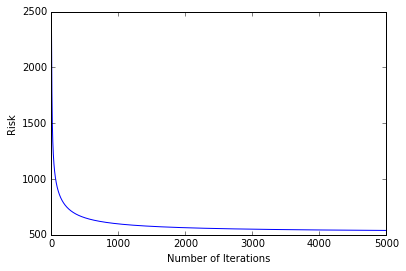

In [8]:
### to do ###
logRisk, batchOmega = batch_grad_desc(logData, yTrain)
plt.plot(logRisk)
plt.ylabel('Risk')
plt.xlabel('Number of Iterations')
### ### ###

### 2.2: Stochastic Gradient Descent

Batch Gradient Descent has a few shortcomings. On one hand it cannot be used at all if our training set does not fit in memory. On the other hand, having to use the entire data set for a single update not only makes it slow, but it also mean that adding an extra sample to our training set would require us to compute the gradient using the entire data set one more time. 

Stochastic Gradient Descent tackles these drawbacks by using a single sample from the training set to update the parameter vector $\textbf{$\omega$}$. Furthermore, by choosing this sample at random the algorithm has a better chance at finding a better local minimum in non-convex loss functions, independent of how $\textbf{$\omega$}$ is initialized (see part 1:1 of this tutorial). 

The gradient of the Cross-Entropy loss function using Stochastic Gradient Descent optimization is given by the following equation:

\begin{align*}
\nabla L[w] &= - y^{(i)}x^{(i)}Sig(- z^{(i)})
\end{align*}

where $i \in {\{1, 2, 3, ..., n\}}$ is choosen at random.

* Fill in the for-loop in stoc_grad_desc to perform an update on omega. As before, append the risk corresponding to that omega to risk_lst. 
* Plot risk_lst over the number of iterations. Is it monotonically decreasing? How does it compare to Batch Gradient Descent? 

In [9]:
def stoc_grad_desc(x, y, eta=0.01, iters=5000):
    """
    Input: x      - Training data set.
           y      - Training labels.
           eta    - Learning rate.
           iters  - Number of iteration to perform.
    
    Output: risk  - A list containing the total risk for each iteration. 
            omega - The resulting omega after convergence.
    """
    n = x.shape[0] # total number of samples in data set
    omega = np.zeros(x.shape[1])
    y = y.T[0]
    Q = np.dot(np.diag(y), x)
    risk_lst = []
    for _ in range(iters):
        ### to do ###
        # perform an update of omega
        # using only one sample from the
        # training data 
        i = np.random.randint(n)
        z = Q.dot(omega)
        omega += eta * y[i] * x[i] * expit(- z[i])
        risk_lst.append(sum(np.log(1 + np.exp(- z))))
        ### ### ###
    return risk_lst, omega

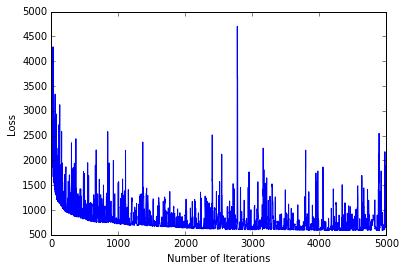

In [10]:
### to do ###
logLoss, stochOmega = stoc_grad_desc(logData, yTrain)
plt.plot(logLoss)
plt.ylabel('Loss')
plt.xlabel('Number of Iterations')
### ### ###

Even though the randomness introduced to SGD causes high variance in risk (spikes in graph), the resulting parameter vector $\textbf{$\omega$}$ is a good estimate of the equivalent BGD.  

In addition to saving computation time by only using a single training sample, notice that Stochastic Gradient Descent is able to perform well with a larger learning rate.  

* Plot the resulting omega vectors from both methods. Are the values similar?  

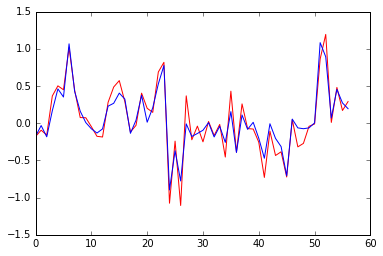

In [11]:
### to do ###
plt.figure()
plt.plot(batchOmega, "-r")
plt.plot(stochOmega, "-b")
plt.show()
### ### ###

#### Extra:

* Repeat the excercise with different values of $\eta$. How does this affect each BGD and SGD? 
* Repeat the excercise and gradually decrease $\eta$ with each iteration. How does this affect each BGD and SGD?